# Survival Analysis & Classification of LUNG CANCER

### What is Cancer?

- Uncontrolled growth and spread of abnormal cells.
- Can start almost anywhere in the body.
- Normal cells grow, divide, and die in an orderly way.
- Cancer disrupts this process, causing old or damaged cells to survive and new cells to form unnecessarily.
- These abnormal cells can form tumors.

### What is Lung Cancer?

Definition:
- Lung cancer is a type of cancer that starts in the lungs, typically in the cells that line the air passages.

Types: 
- There are two main types: non-small cell lung cancer (NSCLC) and small cell lung cancer (SCLC).

Causes: 
- Smoking is the leading cause of lung cancer. Other factors include exposure to secondhand smoke, air pollution, and genetics etc.

Symptoms: 
- Common symptoms include persistent cough, chest pain, shortness of breath, coughing up blood, and weight loss.

Diagnosis: 
- Diagnosis often involves imaging tests like X-rays and CT scans, as well as biopsies to examine lung tissue for cancer cells.

Treatment: 
- Treatment options depend on the type and stage of lung cancer but may include surgery, chemotherapy, radiation therapy, targeted therapy, and immunotherapy.

Prognosis: 
- The prognosis varies based on the stage at which it's diagnosed and the treatment received. Early detection and treatment improve outcomes.

Prevention: 
- Quitting smoking and avoiding exposure to secondhand smoke and other lung carcinogens can help prevent lung cancer.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pt
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

- NumPy - Python  library for numerical computing with support for large arrays and mathematical functions.

- Pandas - Python library for data manipulation and analysis with tabular data structures.

- Seaborn: Python library for statistical data visualization, built on top of Matplotlib.

- Matplotlib: Comprehensive plotting library in Python for creating static, animated, and interactive visualizations.

- Warnings Module: Python module for controlling warning messages issued by the interpreter or libraries.

In [2]:
# Reading the data from the CSV file 
lung_data = pd.read_csv("survey lung cancer.csv")

In [3]:
print(lung_data)

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2       

In [7]:
# shape - refers to the shape of the attribute of an array or DataFrame object
        # - expressed as tuple of integers indicating the dimensions

lung_data.shape

(309, 16)

In [9]:
# duplicated() - to identify duplicate rows in DataFrame

lung_data.duplicated().sum()

33

In [11]:
# to drop the duplicate data

lung_data = lung_data.drop_duplicates()

In [13]:
lung_data

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
279      F   59        1               2        2              2   
280      F   59        2               1        1              1   
281      M   55        2               1        1              1   
282      M   46        1               2        2              1   
283      M   60        1               2        2              1   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2         2         1                  1   
2                  1         2         1         2                  1   
3                  1         1         1         1                  2   
4                  1         1         1         2                  1   
..               ...       ...       ...       ...                ...   
279                1         1         2         2                  1   
280                2         2         2         1                  1   
281                1         2         2         1                  1   
282                1         1         1         1                  1   
283                1         2         1         2                  2   

     COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
0           2                    2                      2           2   
1           1                    2                      2           2   
2           2                    2                      1           2   
3           1                    1                      2           2   
4           2                    2                      1           1   
..        ...                  ...                    ...         ...   
279         2                    1                      2           1   
280         1                    2                      1           1   
281         1                    2                      1           2   
282         1                    1                      2           2   
283         2                    2                      2           2   

    LUNG_CANCER  
0           YES  
1           YES  
2            NO  
3            NO  
4            NO  
..          ...  
279         YES  
280          NO  
281          NO  
282          NO  
283         YES  

[276 rows x 16 columns]

In [15]:
# Checks missing values in each column and returns the number

lung_data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

<Axes: >

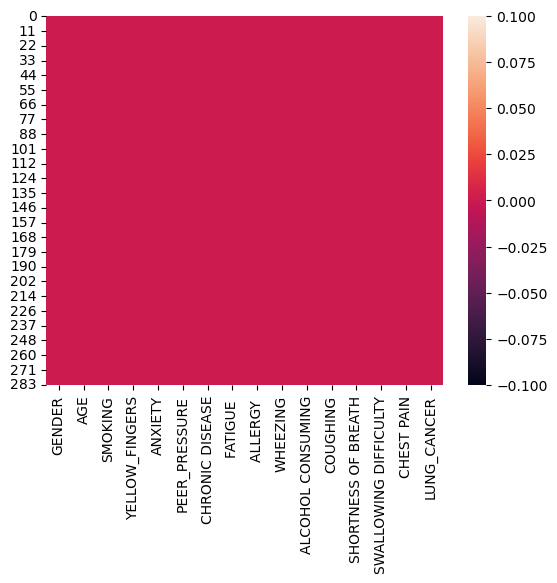

In [15]:
# Seaborn creates a heatmap visualization where missing values in the DataFrame are represented by colored cells

sb.heatmap(lung_data.isnull())

In [16]:
# Depicts the number of parameters in the DataFrame

lung_data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [17]:
# Summary of the parameters/columns including Data Types and null values and memory usage

lung_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

In [19]:
# Provides descriptive statistics of the numerical columns

lung_data.describe()

AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  276.000000  276.000000      276.000000  276.000000     276.000000   
mean    62.909420    1.543478        1.576087    1.496377       1.507246   
std      8.379355    0.499011        0.495075    0.500895       0.500856   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.750000    1.000000        1.000000    1.000000       1.000000   
50%     62.500000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING  \
count       276.000000  276.000000  276.000000  276.000000         276.000000   
mean          1.521739    1.663043    1.547101    1.547101           1.550725   
std           0.500435    0.473529    0.498681    0.498681           0.498324   
min           1.000000    1.000000    1.000000    1.000000           1.000000   
25%           1.000000    1.000000    1.000000    1.000000           1.000000   
50%           2.000000    2.000000    2.000000    2.000000           2.000000   
75%           2.000000    2.000000    2.000000    2.000000           2.000000   
max           2.000000    2.000000    2.000000    2.000000           2.000000   

         COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
count  276.000000           276.000000             276.000000  276.000000  
mean     1.576087             1.630435               1.467391    1.557971  
std      0.495075             0.483564               0.499842    0.497530  
min      1.000000             1.000000               1.000000    1.000000  
25%      1.000000             1.000000               1.000000    1.000000  
50%      2.000000             2.000000               1.000000    2.000000  
75%      2.000000             2.000000               2.000000    2.000000  
max      2.000000             2.000000               2.000000    2.000000

In [21]:
# To convert Categorical data to numeric data
# It assings a unique integer to each category in the variable
from sklearn.preprocessing import LabelEncoder

In [23]:
# This allows algorithms to work with data, as many ML algos require numerical input

obj = LabelEncoder()

fit_transform()

- Used in ML Pre-processing to both fit a transformation on the data and apply it in a single step.
- Often used with techniques like- scaling,normalization, encoding categorical variables to prepare data for modeling.

In [25]:
gender = obj.fit_transform(lung_data["GENDER"])
gender

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [27]:
cancer = obj.fit_transform(lung_data["LUNG_CANCER"])
cancer

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1])

In [29]:
lung_data.drop(["GENDER"],axis=1,inplace=True)

In [31]:
lung_data.drop(["LUNG_CANCER"],axis=1,inplace=True)

In [33]:
lung_data["GENDER"]=gender

In [35]:
lung_data["LUNG_CANCER"]=cancer

In [37]:
lung_data

AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  \
0     69        1               2        2              1                1   
1     74        2               1        1              1                2   
2     59        1               1        1              2                1   
3     63        2               2        2              1                1   
4     63        1               2        1              1                1   
..   ...      ...             ...      ...            ...              ...   
279   59        1               2        2              2                1   
280   59        2               1        1              1                2   
281   55        2               1        1              1                1   
282   46        1               2        2              1                1   
283   60        1               2        2              1                1   

     FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0           2         1         2                  2         2   
1           2         2         1                  1         1   
2           2         1         2                  1         2   
3           1         1         1                  2         1   
4           1         1         2                  1         2   
..        ...       ...       ...                ...       ...   
279         1         2         2                  1         2   
280         2         2         1                  1         1   
281         2         2         1                  1         1   
282         1         1         1                  1         1   
283         2         1         2                  2         2   

     SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  GENDER  \
0                      2                      2           2       1   
1                      2                      2           2       1   
2                      2                      1           2       0   
3                      1                      2           2       1   
4                      2                      1           1       0   
..                   ...                    ...         ...     ...   
279                    1                      2           1       0   
280                    2                      1           1       0   
281                    2                      1           2       1   
282                    1                      2           2       1   
283                    2                      2           2       1   

     LUNG_CANCER  
0              1  
1              1  
2              0  
3              0  
4              0  
..           ...  
279            1  
280            0  
281            0  
282            0  
283            1  

[276 rows x 16 columns]

In [39]:
# to change 1's and 2's for better understanding

cols = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 
                  'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 
                  'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 
                  'SWALLOWING DIFFICULTY', 'CHEST PAIN']

# Mapping 1 to 0 and 2 to 1
for column in cols:
    lung_data[column] = lung_data[column].replace({1: 0, 2: 1})

# Display the first few rows to confirm the changes
print(lung_data.head())

   AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  \
0   69        0               1        1              0                0   
1   74        1               0        0              0                1   
2   59        0               0        0              1                0   
3   63        1               1        1              0                0   
4   63        0               1        0              0                0   

   FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0         1         0         1                  1         1   
1         1         1         0                  0         0   
2         1         0         1                  0         1   
3         0         0         0                  1         0   
4         0         0         1                  0         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  GENDER  LUNG_CANCER  
0                    1                      1           1       1            

lung_data

## DATA VISUALIZATION

CORRELATION MATRIX

- It is a table showing correlation cofficients between variables.
- It calculates the correlation coeff btwn columns of DataFrame
- The heatmap visualizes these coefficients, with higher values indicates stronger coorrelations.
- The heatmap's color intensity represents the strength and direction of correlation
- The resulting plot provides insights into the relationships between variables, aiding in data exploration and feature selection.

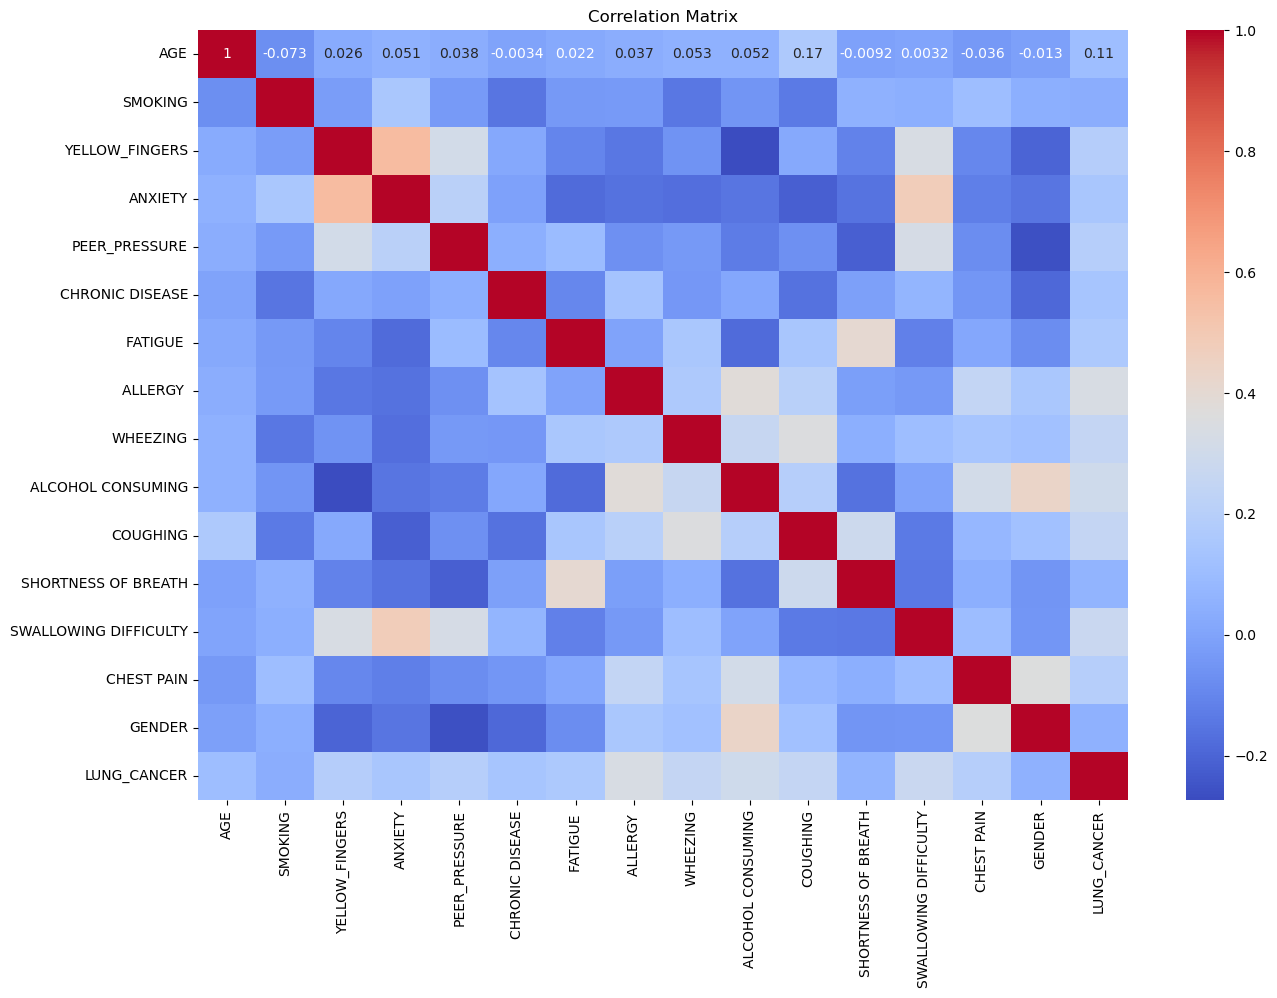

In [41]:
# Calculate the correlation matrix
correlation_matrix = lung_data.corr()

# Plot the heatmap
pt.figure(figsize=(15, 10))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
pt.title('Correlation Matrix')
pt.show()

BOXPLOT
- Represents the interquartile range(IQR) of the data, with the median shown as a line inside the box.
- The "whiskers" extend to the furthest data points that are not considered outliers.
- Any data points beyond the whiskers are considered outliers and shown individually as points.

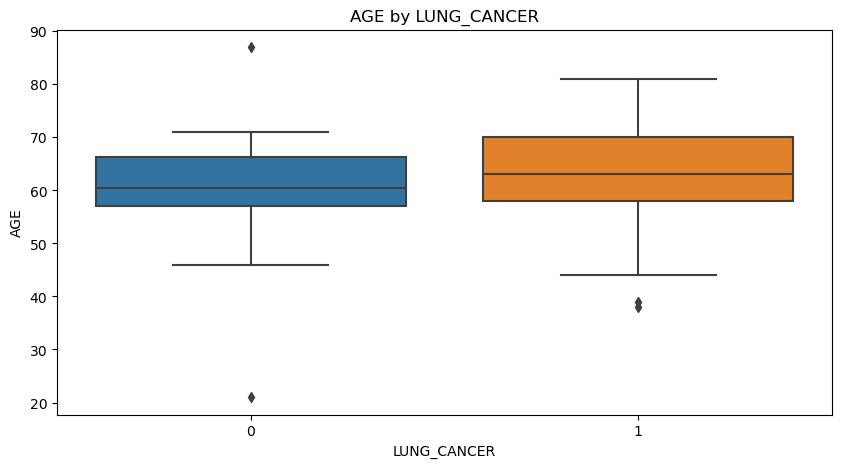

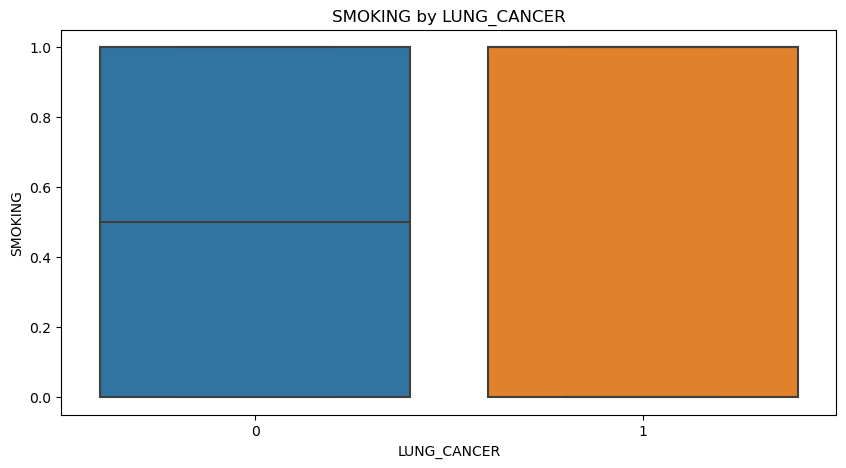

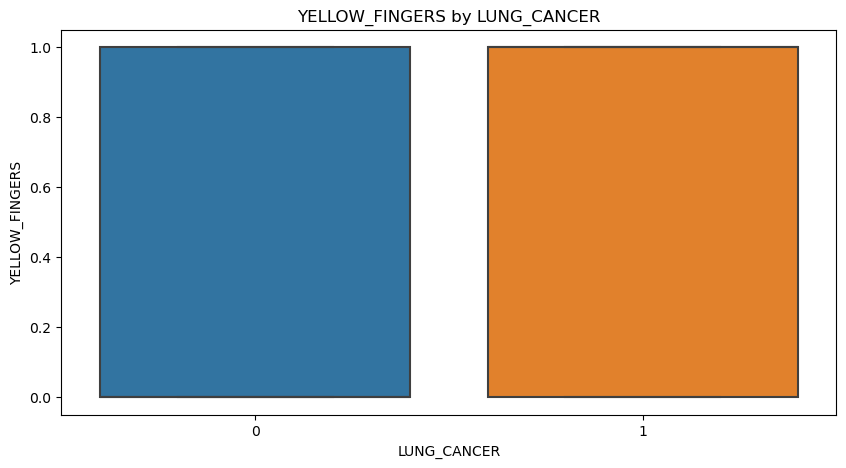

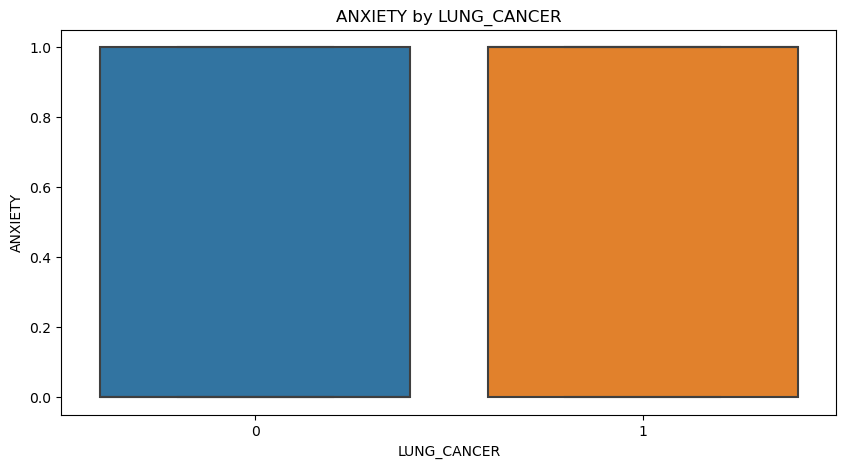

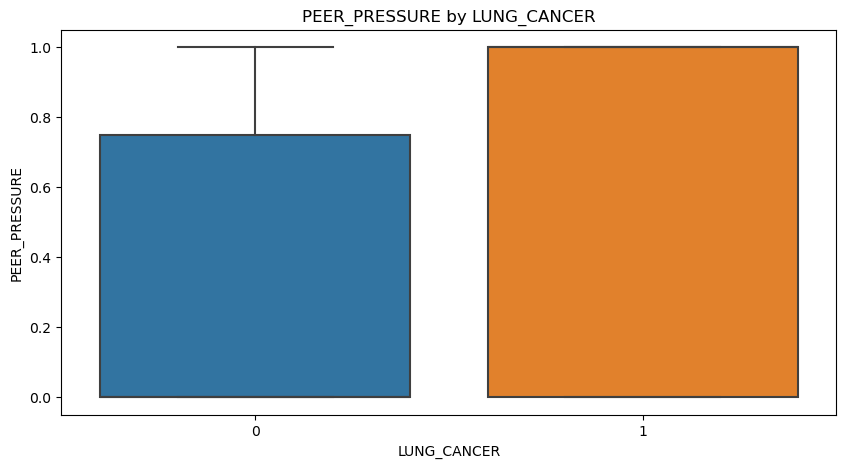

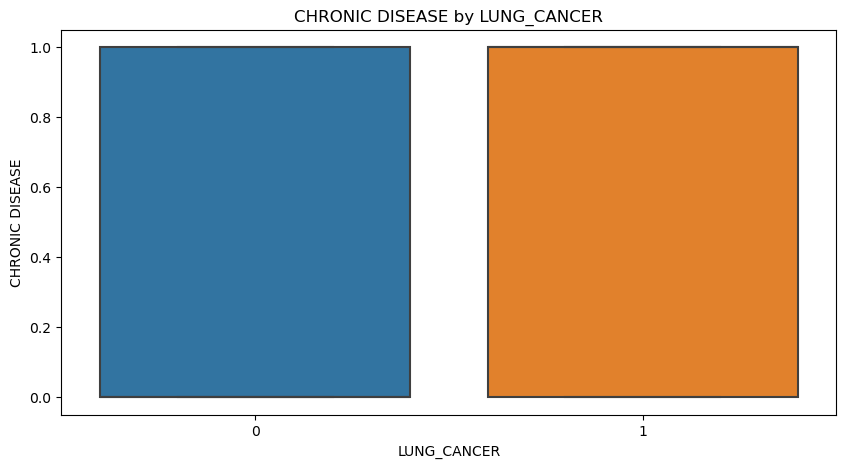

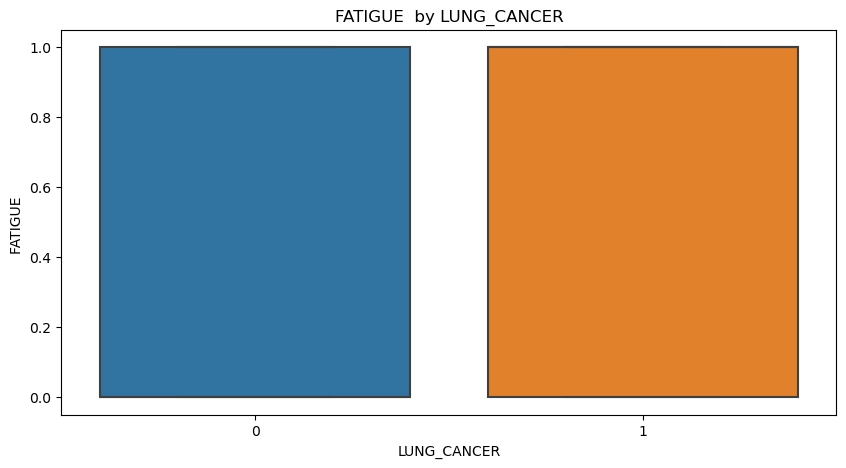

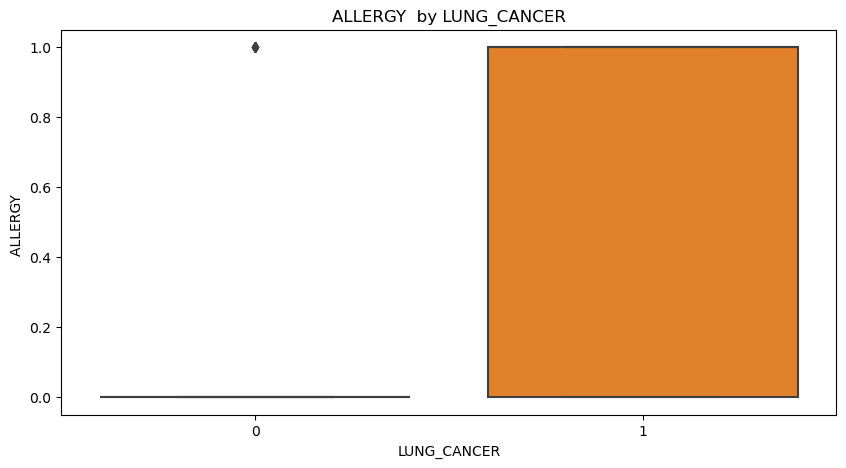

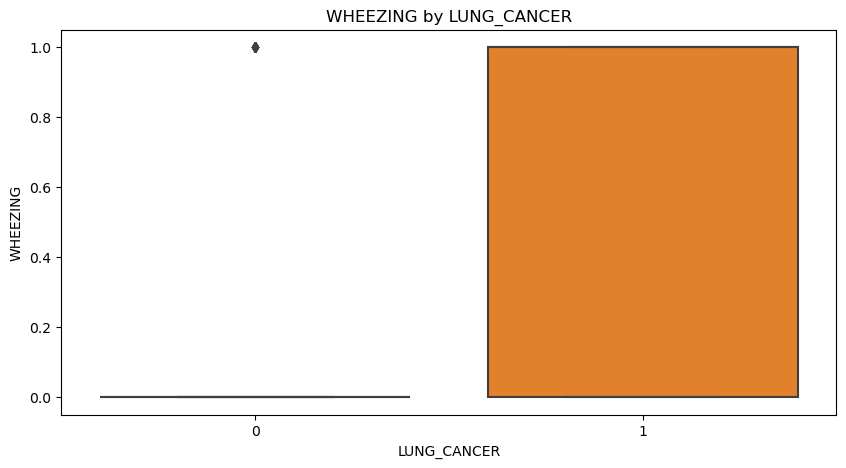

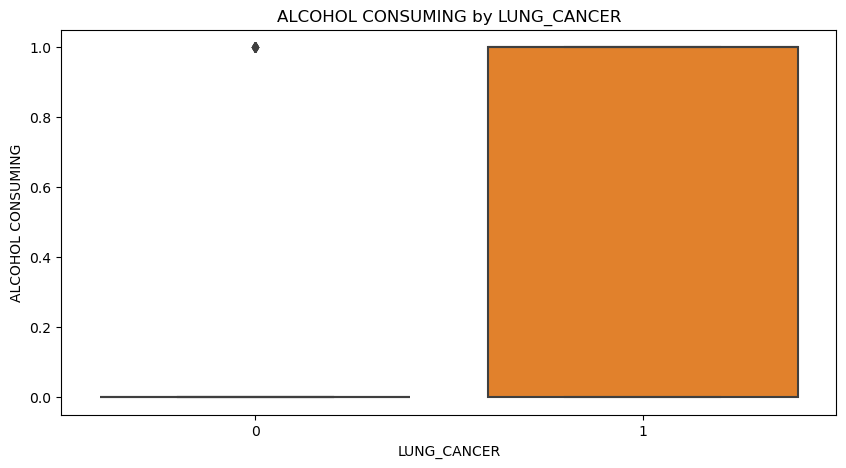

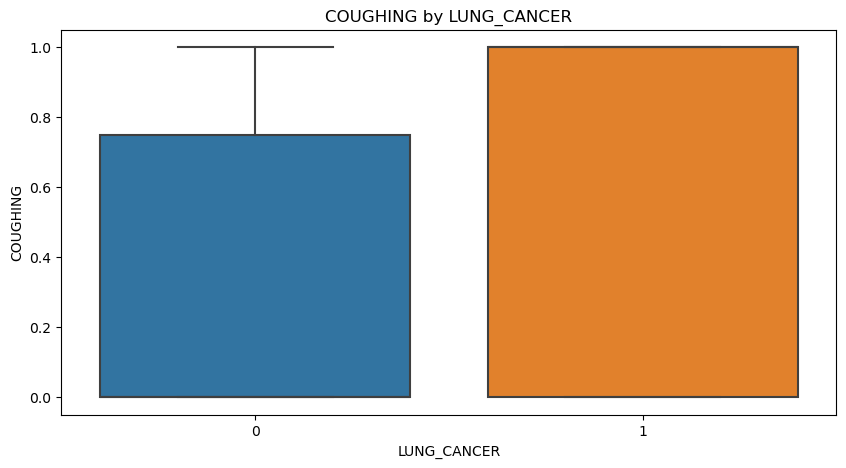

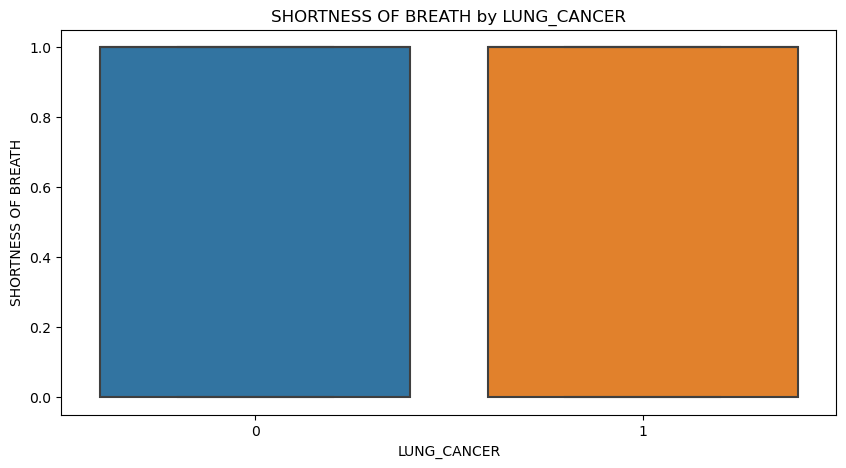

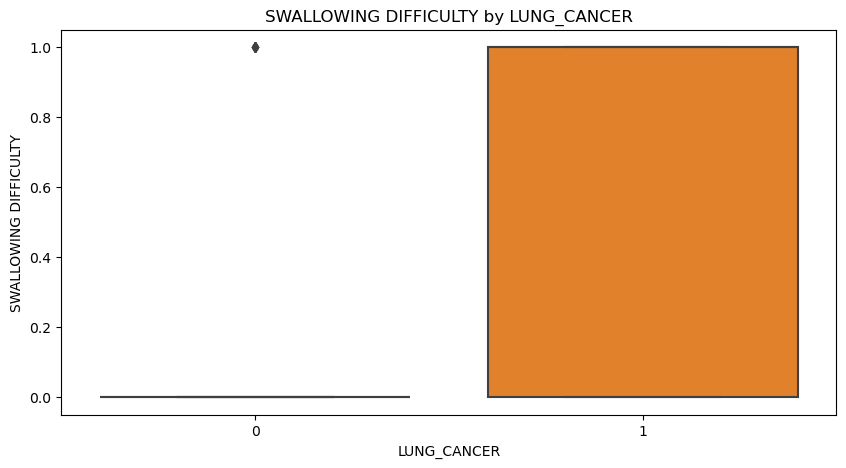

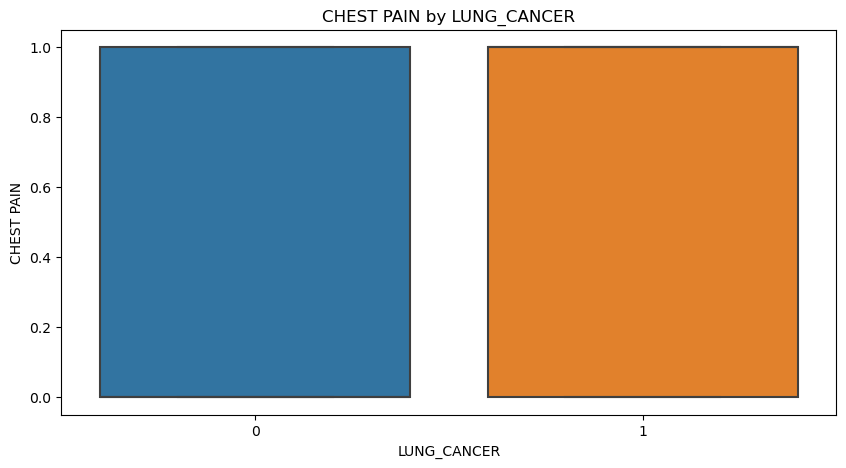

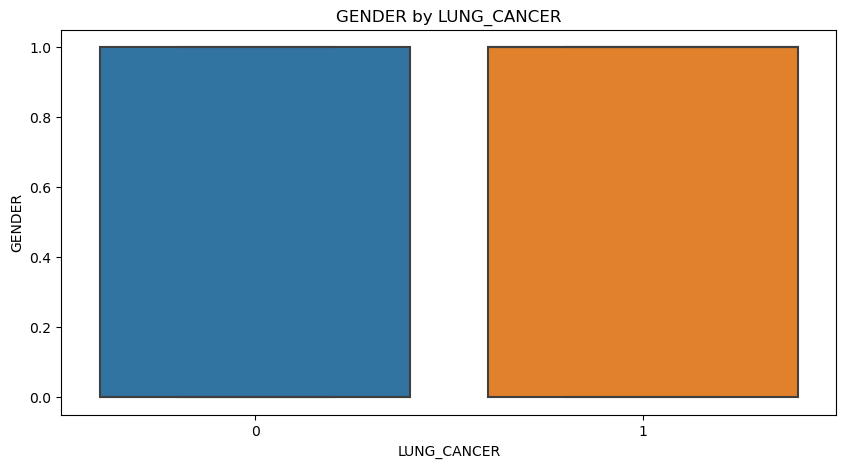

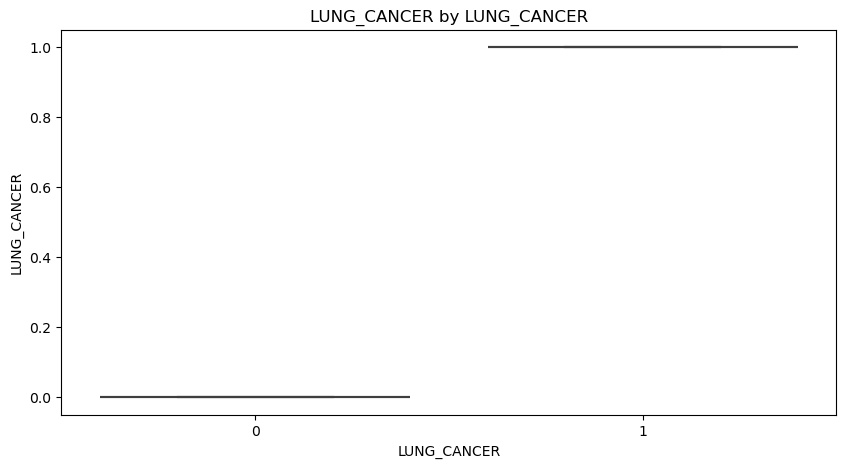

In [43]:
# boxplot to compare features by lung cancer
for feature in lung_data.columns:
    pt.figure(figsize=(10, 5))
    sb.boxplot(x='LUNG_CANCER', y=feature, data=lung_data)
    pt.title(f'{feature} by LUNG_CANCER')
    pt.show()


### How many are smokers and also consume alcohol?

Number of people who smoke and consume alcohol:
 ALCOHOL CONSUMING   0   1
SMOKING                  
0                  53  73
1                  71  79


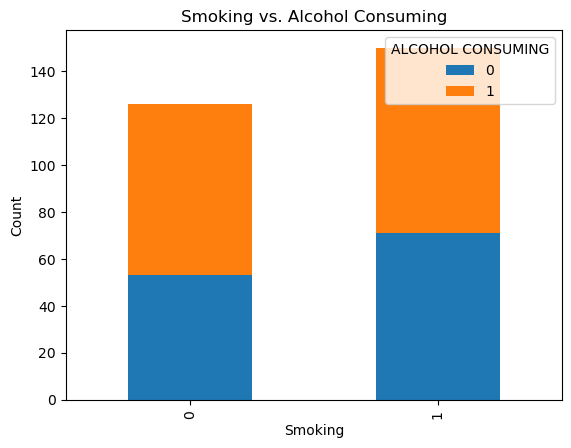

In [37]:
# Number of people who smoke and consume alcohol
smoke_and_alcohol = pd.crosstab(lung_data['SMOKING'], lung_data['ALCOHOL CONSUMING'])
print("Number of people who smoke and consume alcohol:\n", smoke_and_alcohol)

# Plot Smoking vs. Alcohol Consuming
smoke_and_alcohol.plot(kind='bar', stacked=True)
pt.title('Smoking vs. Alcohol Consuming')
pt.xlabel('Smoking')
pt.ylabel('Count')
pt.show()


### Average age of lung cancer patients?

Average age of lung cancer patients: 63.26470588235294
Average age comparison:
 LUNG_CANCER
0    60.684211
1    63.264706
Name: AGE, dtype: float64


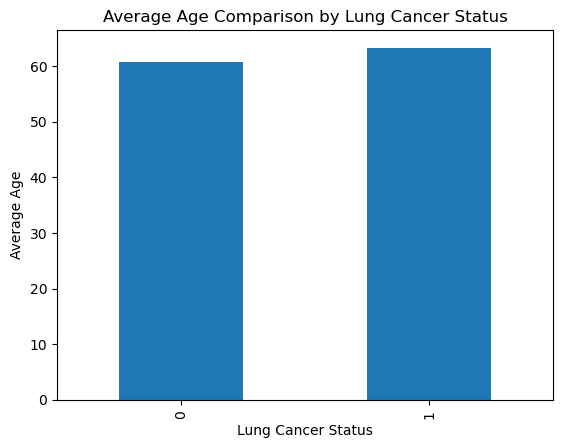

In [44]:
# Average age of lung cancer patients
avg_age_lung_cancer = lung_data[lung_data['LUNG_CANCER'] == 1]['AGE'].mean()
print("Average age of lung cancer patients:", avg_age_lung_cancer)

# Compare the average age of lung cancer patients with non-patients
avg_age_comparison = lung_data.groupby('LUNG_CANCER')['AGE'].mean()
print("Average age comparison:\n", avg_age_comparison)

# Plot average age comparison
avg_age_comparison.plot(kind='bar')
pt.title('Average Age Comparison by Lung Cancer Status')
pt.xlabel('Lung Cancer Status')
pt.ylabel('Average Age')
pt.show()


### How does anxiety affect the likelihood of lung cancer?

Anxiety vs. Lung Cancer likelihood:
 LUNG_CANCER         0         1
ANXIETY                        
0            0.187050  0.812950
1            0.087591  0.912409


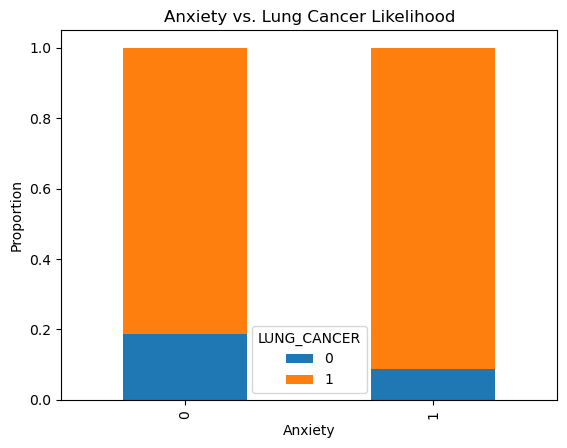

In [47]:
# Anxiety vs. Lung Cancer likelihood
anxiety_lung_cancer = pd.crosstab(lung_data['ANXIETY'], lung_data['LUNG_CANCER'], normalize='index')
print("Anxiety vs. Lung Cancer likelihood:\n", anxiety_lung_cancer)

# Plot Anxiety vs. Lung Cancer likelihood
anxiety_lung_cancer.plot(kind='bar', stacked=True)
pt.title('Anxiety vs. Lung Cancer Likelihood')
pt.xlabel('Anxiety')
pt.ylabel('Proportion')
pt.show()


###  Is there a gender difference in lung cancer rates?

Gender difference in lung cancer rates:
 LUNG_CANCER         0         1
GENDER                         
0            0.156716  0.843284
1            0.119718  0.880282


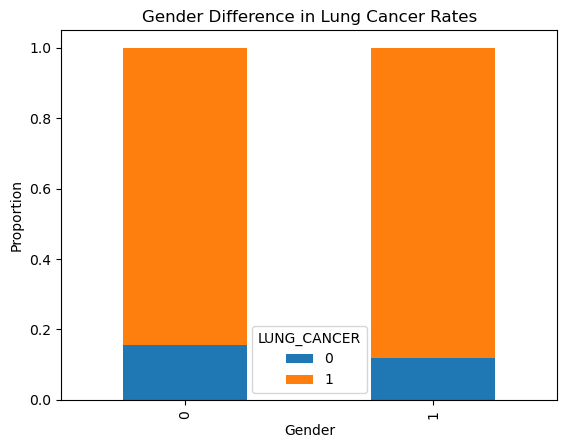

In [49]:
# Lung cancer rates by gender
gender_lung_cancer = pd.crosstab(lung_data['GENDER'], lung_data['LUNG_CANCER'], normalize='index')
print("Gender difference in lung cancer rates:\n", gender_lung_cancer)

# Plot Gender vs. Lung Cancer rates
gender_lung_cancer.plot(kind='bar', stacked=True)
pt.title('Gender Difference in Lung Cancer Rates')
pt.xlabel('Gender')
pt.ylabel('Proportion')
pt.show()

### How does Peer pressure influence smoking habits?

Peer Pressure vs. Smoking habits:
 SMOKING               0         1
PEER_PRESSURE                    
0              0.441176  0.558824
1              0.471429  0.528571


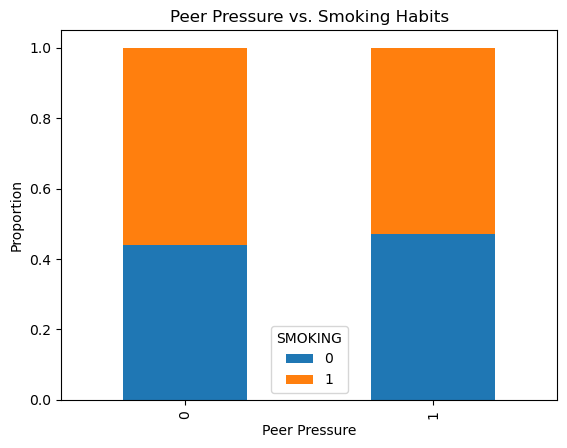

In [51]:
# Peer pressure vs. smoking habits
peer_pressure_smoking = pd.crosstab(lung_data['PEER_PRESSURE'], lung_data['SMOKING'], normalize='index')
print("Peer Pressure vs. Smoking habits:\n", peer_pressure_smoking)

# Plot Peer Pressure vs. Smoking
peer_pressure_smoking.plot(kind='bar', stacked=True)
pt.title('Peer Pressure vs. Smoking Habits')
pt.xlabel('Peer Pressure')
pt.ylabel('Proportion')
pt.show()

### Relationship between yellow fingers and lung cancer?

Yellow Fingers vs. Lung Cancer:
 LUNG_CANCER            0         1
YELLOW_FINGERS                    
0               0.213675  0.786325
1               0.081761  0.918239


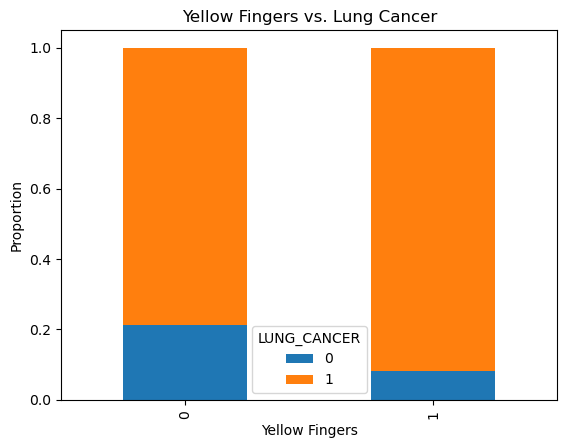

In [53]:
# Yellow fingers vs. lung cancer
yellow_fingers_lung_cancer = pd.crosstab(lung_data['YELLOW_FINGERS'], lung_data['LUNG_CANCER'], normalize='index')
print("Yellow Fingers vs. Lung Cancer:\n", yellow_fingers_lung_cancer)

# Plot Yellow Fingers vs. Lung Cancer
yellow_fingers_lung_cancer.plot(kind='bar', stacked=True)
pt.title('Yellow Fingers vs. Lung Cancer')
pt.xlabel('Yellow Fingers')
pt.ylabel('Proportion')
pt.show()

### How Common are Allergies Among Lung Cancer Patients?

Allergies among lung cancer patients:
 LUNG_CANCER         0         1
ALLERGY                        
0            0.264000  0.736000
1            0.033113  0.966887


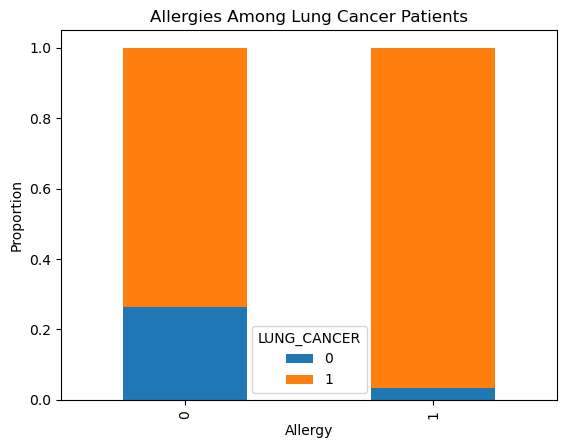

In [55]:
# Allergies among lung cancer patients
allergy_lung_cancer = pd.crosstab(lung_data['ALLERGY '], lung_data['LUNG_CANCER'], normalize='index')
print("Allergies among lung cancer patients:\n", allergy_lung_cancer)

# Plot Allergies vs. Lung Cancer
allergy_lung_cancer.plot(kind='bar', stacked=True)
pt.title('Allergies Among Lung Cancer Patients')
pt.xlabel('Allergy')
pt.ylabel('Proportion')
pt.show()


### Chronic Disease and Its Impact on Lung Cancer

Chronic Disease vs. Lung Cancer:
 LUNG_CANCER             0         1
CHRONIC DISEASE                    
0                0.189394  0.810606
1                0.090278  0.909722


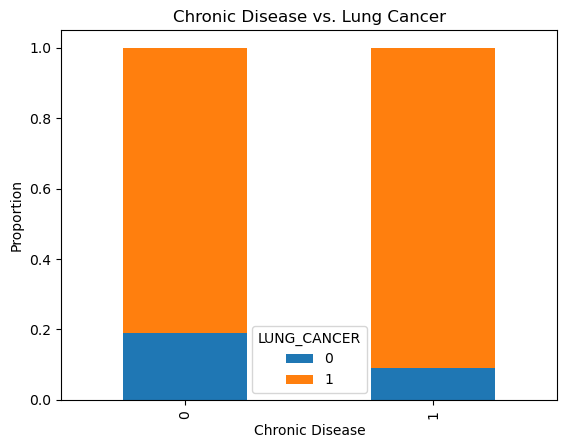

In [57]:
# Chronic disease vs. lung cancer
chronic_disease_lung_cancer = pd.crosstab(lung_data['CHRONIC DISEASE'], lung_data['LUNG_CANCER'], normalize='index')
print("Chronic Disease vs. Lung Cancer:\n", chronic_disease_lung_cancer)

# Plot Chronic Disease vs. Lung Cancer
chronic_disease_lung_cancer.plot(kind='bar', stacked=True)
pt.title('Chronic Disease vs. Lung Cancer')
pt.xlabel('Chronic Disease')
pt.ylabel('Proportion')
pt.show()


### How Does Fatigue Correlate with Lung Cancer?

Fatigue vs. Lung Cancer:
 LUNG_CANCER         0         1
FATIGUE                        
0            0.215054  0.784946
1            0.098361  0.901639


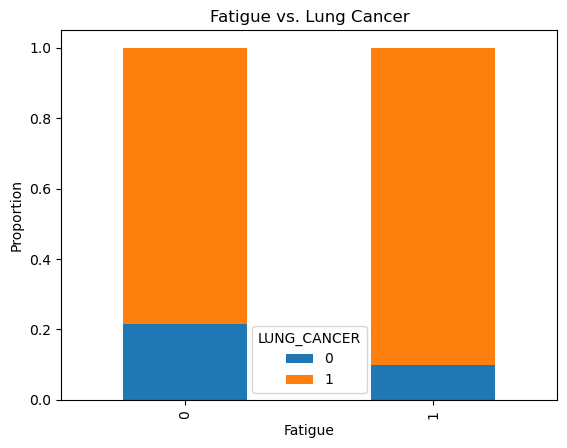

In [59]:
# Fatigue vs. lung cancer
fatigue_lung_cancer = pd.crosstab(lung_data['FATIGUE '], lung_data['LUNG_CANCER'], normalize='index')
print("Fatigue vs. Lung Cancer:\n", fatigue_lung_cancer)

# Plot Fatigue vs. Lung Cancer
fatigue_lung_cancer.plot(kind='bar', stacked=True)
pt.title('Fatigue vs. Lung Cancer')
pt.xlabel('Fatigue')
pt.ylabel('Proportion')
pt.show()


### Correlation Between Wheezing and Lung Cancer

Wheezing vs. Lung Cancer:
 LUNG_CANCER         0         1
WHEEZING                       
0            0.232000  0.768000
1            0.059603  0.940397


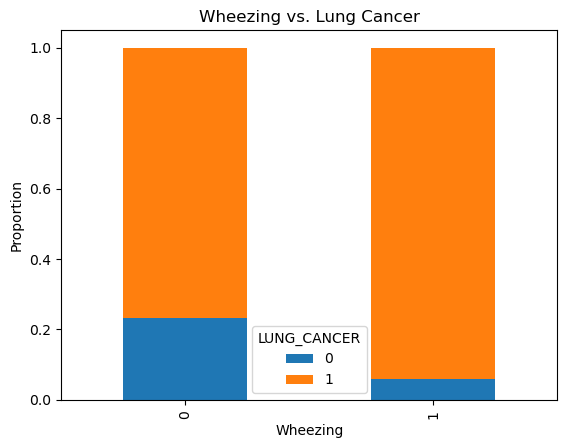

In [61]:
# Wheezing vs. lung cancer
wheezing_lung_cancer = pd.crosstab(lung_data['WHEEZING'], lung_data['LUNG_CANCER'], normalize='index')
print("Wheezing vs. Lung Cancer:\n", wheezing_lung_cancer)

# Plot Wheezing vs. Lung Cancer
wheezing_lung_cancer.plot(kind='bar', stacked=True)
pt.title('Wheezing vs. Lung Cancer')
pt.xlabel('Wheezing')
pt.ylabel('Proportion')
pt.show()

### DATA PRE-PROCESSING FOR MACHINE LEARNING

- Data preprocessing for machine learning involves cleaning, transforming, and organizing raw data to prepare it for analysis by machine learning algorithms.
- This includes handling missing values, converting categorical variables to numerical format, scaling numerical features, selecting relevant features, splitting data into training/validation/testing sets, normalizing data, handling imbalanced data, and encoding categorical variables.
- These steps ensure that the data is in a suitable format for training and evaluating machine learning models, leading to more accurate predictions.

TRAIN TEST SPLIT
- is a function from the scikit-learn library (sklearn) in Python used for splitting datasets into two subsets: one for training a machine learning model and the other for testing its performance.

In [63]:
from sklearn.model_selection import train_test_split

- Input: It takes in the features (X) and target variable (y) arrays or DataFrames.

- Output: It returns four sets of data:
  - X_train (features for training)
  - X_test (features for testing)
  -  y_train (target variable for training) and
  -  y_test (target variable for testing).

In [65]:
# Separate features and target variable
X = lung_data.drop(columns=['LUNG_CANCER'])
y = lung_data['LUNG_CANCER']

In [67]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- test_size:
  - Specifies the proportion of the data to include in the test split.
- train_size:
  - Specifies the proportion of the data to include in the train split.
random_state: Sets a seed for reproducibility, ensuring that the split is the same each time.

## Decision Tree classifier

- Decision Tree Classifier is a machine learning model that predicts the target variable by learning simple decision rules inferred from the data features.
- It creates a tree-like structure where each internal node represents a feature, each branch represents a decision based on that feature, and each leaf node represents a class label.
- Decision trees are interpretable, versatile, and suitable for both classification and regression tasks.
- They're used in various domains due to their simplicity and effectiveness in capturing complex relationships in the data.

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=0)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [73]:
y_dt_pred = dt_model.predict(X_test)
y_dt_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [75]:
from sklearn.metrics import classification_report

In [77]:
#Model accuracy
dt_cr=classification_report(y_test, y_dt_pred)
print(dt_cr)

              precision    recall  f1-score   support

           0       0.60      0.25      0.35        12
           1       0.82      0.95      0.88        44

    accuracy                           0.80        56
   macro avg       0.71      0.60      0.62        56
weighted avg       0.78      0.80      0.77        56



## RandomForest Classifier

- The Random Forest Classifier is a ML model that combines multiple decision trees to make predictions.
- It's robust, handles high-dimensional data well, and provides measures of feature importance.
- Random Forest is widely used for classification tasks due to its simplicity, scalability, and effectiveness.

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
# Initialize the model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_rf_pred = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           0       0.83      0.42      0.56        12
           1       0.86      0.98      0.91        44

    accuracy                           0.86        56
   macro avg       0.85      0.70      0.74        56
weighted avg       0.85      0.86      0.84        56



## Gaussian Naive Bayes Classifier

- Gaussian Naive Bayes Classifier is a probabilistic machine learning model used for classification tasks.
- It assumes that features are independent and follows a Gaussian (normal) distribution.
- This classifier calculates the probability of each class label given the input features using Bayes' theorem.
- It's simple, fast, and efficient for high-dimensional data but may not perform well if the independence assumption is violated. It's commonly used in text classification and spam filtering tasks.

In [83]:
#Fitting Gaussian Naive Bayes classifier to the training set  
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [85]:
#Predicting result using testing data
y_gnb_pred= gnb_model.predict(X_test)
y_gnb_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [87]:
#Model accuracy
gnb_cr=classification_report(y_test, y_gnb_pred)
print(gnb_cr)

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.91      0.98      0.95        44

    accuracy                           0.91        56
   macro avg       0.90      0.82      0.85        56
weighted avg       0.91      0.91      0.91        56



## Multinomial Naive Bayes classifier

- Multinomial Naive Bayes Classifier is a probabilistic machine learning model used primarily for text classification tasks.
- It's an extension of the Naive Bayes algorithm that assumes features are independent and follows a multinomial distribution.
- It's particularly suited for classification tasks with discrete features, such as word counts in document classification.
- Despite its simplifying assumptions, it often performs well in practice and is computationally efficient, making it a popular choice for text classification problems.

In [89]:
#Fitting Multinomial Naive Bayes classifier to the training set  
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)

MultinomialNB()

In [91]:
#Predicting result using testing data
y_mnb_pred= mnb_model.predict(X_test)
y_mnb_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [93]:
#Model accuracy
mnb_cr=classification_report(y_test, y_mnb_pred)
print(mnb_cr)

              precision    recall  f1-score   support

           0       1.00      0.17      0.29        12
           1       0.81      1.00      0.90        44

    accuracy                           0.82        56
   macro avg       0.91      0.58      0.59        56
weighted avg       0.85      0.82      0.77        56



## MLP Classifier

-  MLP Classifier is a type of neural network used for classification tasks. It consists of multiple layers of nodes and applies nonlinear functions to learn complex patterns in the data.
-  It's trained using backpropagation and is versatile, suitable for various applications due to its ability to capture non-linear relationships.

In [95]:
#Training a neural network model
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)

MLPClassifier()

In [97]:
#Predicting result using testing data
y_mlp_pred= mlp_model.predict(X_test)
y_mlp_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [99]:
#Model accuracy
mlp_cr=classification_report(y_test, y_mlp_pred)
print(mlp_cr)

              precision    recall  f1-score   support

           0       1.00      0.25      0.40        12
           1       0.83      1.00      0.91        44

    accuracy                           0.84        56
   macro avg       0.92      0.62      0.65        56
weighted avg       0.87      0.84      0.80        56



## CROSS - VALIDATION

- Cross-validation is a technique used to evaluate machine learning models by splitting the dataset into multiple subsets, training the model on some subsets, and evaluating it on others.
- This helps estimate how well the model will perform on unseen data and reduces the risk of overfitting.

In [92]:
# The cross_val_score and cross_validate functions in scikit-learn 
#facilitate this process by providing evaluation scores for each fold.

In [101]:
from sklearn.model_selection import cross_val_score, cross_validate

CONFUSION MATRIX:
- It is a table that visualizes the performance of a classification model by comparing predicted and actual class labels.
- It shows the number of true positives, true negatives, false positives, and false negatives, allowing for evaluation of model accuracy, precision, recall, and other performance metrics.

In [103]:
from sklearn.metrics import confusion_matrix

In [105]:
# We have, Separate features and target variable
#X = lung_data.drop(columns=['LUNG_CANCER'])
#y = lung_data['LUNG_CANCER']

# Ensure data types are correct
X = X.astype(float)
y = y.astype(int)

In [107]:
# Define the Classifiers
# It is a Dictionary so it has key value pairs
models = {
    'RandomForest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier(criterion='entropy', random_state=0),
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'MLPClassifier': MLPClassifier(max_iter=500)
}

In [109]:
# Check if the classifiers are defined correctly
for model_name, model in models.items():
    print(f'{model_name}: {model}')

RandomForest: RandomForestClassifier()
DecisionTree: DecisionTreeClassifier(criterion='entropy', random_state=0)
GaussianNB: GaussianNB()
MultinomialNB: MultinomialNB()
MLPClassifier: MLPClassifier(max_iter=500)


In [111]:
# Define a scoring method
# below is the list of scoring metrics used for evaluating the models during corss validation
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform cross-validation
cv_results = {} # empty dict to stores cv results
# name is the key(model name) & model is the value(model itself)
for name, model in models.items(): # iterates through dictionary of models
    print(f"Cross-validating {name}...")
    scores = cross_validate(model, X, y, cv=5, scoring=scoring, return_train_score=False)
    # cv=5 -> performs 5-fold cv on current model
    # return_train_score=F -> does not return training scores.
    cv_results[name] = scores

# Print cross-validation results
# Iterates over dict of cv results
for name, result in cv_results.items():
    print(f"\n{name} Cross-Validation Results:")
    for metric in scoring: #iterates over each metric in scoring list
        print(f"{metric.capitalize()} - Mean: {np.mean(result[f'test_{metric}']):.4f}, Std: {np.std(result[f'test_{metric}']):.4f}")


Cross-validating RandomForest...
Cross-validating DecisionTree...
Cross-validating GaussianNB...
Cross-validating MultinomialNB...
Cross-validating MLPClassifier...

RandomForest Cross-Validation Results:
Accuracy - Mean: 0.9021, Std: 0.0187
Precision - Mean: 0.9345, Std: 0.0137
Recall - Mean: 0.9538, Std: 0.0205
F1 - Mean: 0.9439, Std: 0.0104

DecisionTree Cross-Validation Results:
Accuracy - Mean: 0.8224, Std: 0.0534
Precision - Mean: 0.9141, Std: 0.0264
Recall - Mean: 0.8777, Std: 0.0709
F1 - Mean: 0.8934, Std: 0.0371

GaussianNB Cross-Validation Results:
Accuracy - Mean: 0.9021, Std: 0.0425
Precision - Mean: 0.9357, Std: 0.0373
Recall - Mean: 0.9536, Std: 0.0314
F1 - Mean: 0.9439, Std: 0.0244

MultinomialNB Cross-Validation Results:
Accuracy - Mean: 0.8876, Std: 0.0215
Precision - Mean: 0.8965, Std: 0.0091
Recall - Mean: 0.9832, Std: 0.0206
F1 - Mean: 0.9378, Std: 0.0122

MLPClassifier Cross-Validation Results:
Accuracy - Mean: 0.8769, Std: 0.0263
Precision - Mean: 0.8984, Std: 0.0


Training RandomForest on the full training set...

RandomForest Confusion Matrix:
 [[ 5  7]
 [ 0 44]]

RandomForest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.86      1.00      0.93        44

    accuracy                           0.88        56
   macro avg       0.93      0.71      0.76        56
weighted avg       0.89      0.88      0.85        56


Training DecisionTree on the full training set...

DecisionTree Confusion Matrix:
 [[ 3  9]
 [ 2 42]]

DecisionTree Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.25      0.35        12
           1       0.82      0.95      0.88        44

    accuracy                           0.80        56
   macro avg       0.71      0.60      0.62        56
weighted avg       0.78      0.80      0.77        56


Training GaussianNB on the full training set...

GaussianNB Con

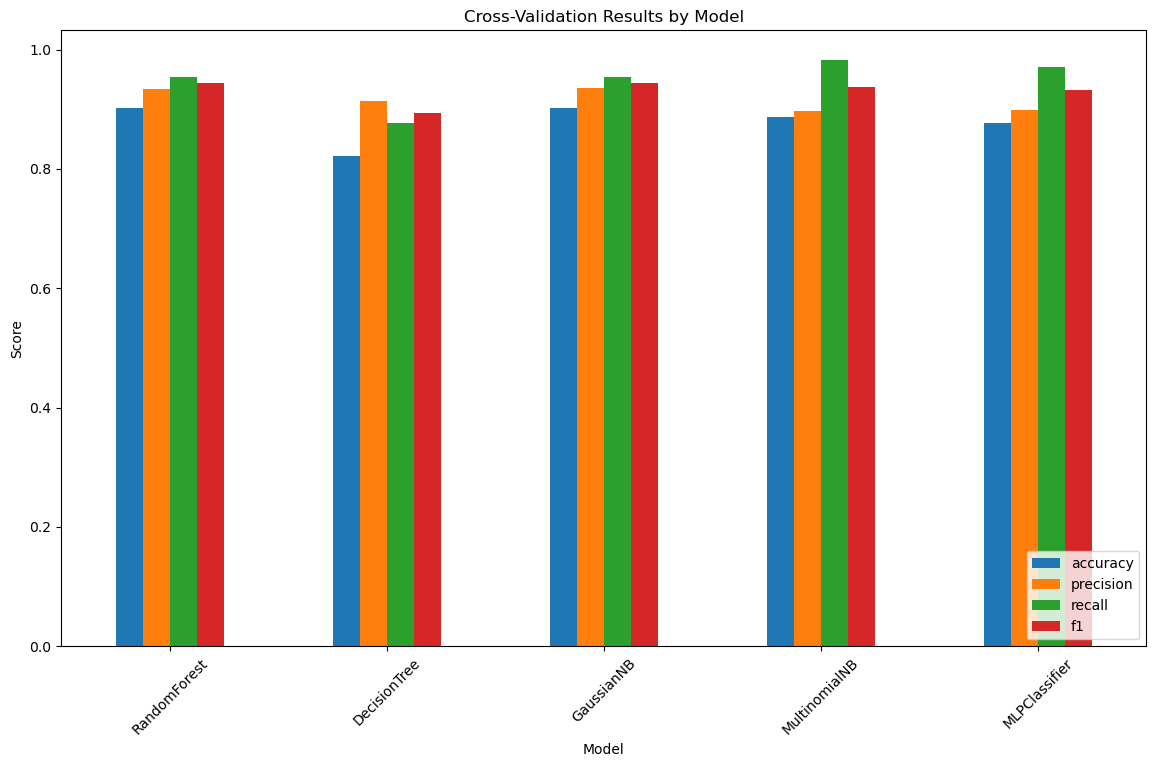

In [113]:
# Final Evaluation on the Test Set
final_results = {}
for name, model in models.items():
    print(f"\nTraining {name} on the full training set...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n{name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))
    
    final_results[name] = classification_report(y_test, y_pred, output_dict=True)

# Convert final results to a DataFrame for easier comparison
final_results_df = pd.DataFrame(final_results).transpose()

# Plot cross-validation results
cv_results_df = pd.DataFrame({
    metric: [np.mean(result[f'test_{metric}']) for result in cv_results.values()]
    for metric in scoring
}, index=cv_results.keys())

cv_results_df.plot(kind='bar', figsize=(14, 8))
pt.title('Cross-Validation Results by Model')
pt.xlabel('Model')
pt.ylabel('Score')
pt.xticks(rotation=45)
pt.legend(loc='lower right')
pt.show()

Cross-validating RandomForest...
RandomForest Accuracy: 0.8986 (+/- 0.0184)
Cross-validating DecisionTree...
DecisionTree Accuracy: 0.8224 (+/- 0.0534)
Cross-validating GaussianNB...
GaussianNB Accuracy: 0.9021 (+/- 0.0425)
Cross-validating MultinomialNB...
MultinomialNB Accuracy: 0.8876 (+/- 0.0215)
Cross-validating MLPClassifier...
MLPClassifier Accuracy: 0.8731 (+/- 0.0205)


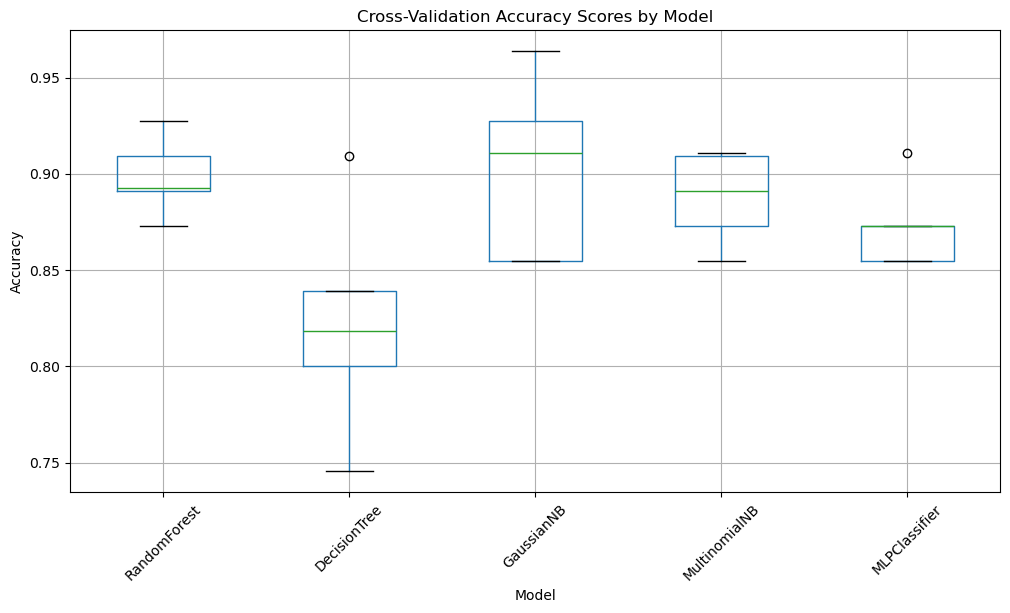

In [115]:
# Perform cross-validation and collect accuracy scores
accuracy_scores = {}
for name, model in models.items():
    print(f"Cross-validating {name}...")
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    accuracy_scores[name] = scores
    print(f"{name} Accuracy: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")

# Convert results to a DataFrame for easier plotting
accuracy_scores_df = pd.DataFrame(accuracy_scores)

# Plot accuracy scores
pt.figure(figsize=(12, 6))
accuracy_scores_df.boxplot()
pt.title('Cross-Validation Accuracy Scores by Model')
pt.xlabel('Model')
pt.ylabel('Accuracy')
pt.xticks(rotation=45)
pt.show()

## Using CNN for Classification

In [117]:
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [118]:
# Base path
directory = r"C:\Users\hiren\Rishi\lung_cancer"
categories = ["Bengin cases", "Malignant cases", "Normal cases"]

In [119]:
# Parameters
img_size = (64, 64)
batch_size = 32

In [120]:
import imageio

In [121]:
size_data = {}
for i in categories:
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    temp_dict = {}
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        height, width, channels = imageio.imread(filepath).shape
        if str(height) + ' x ' + str(width) in temp_dict:
            temp_dict[str(height) + ' x ' + str(width)] += 1 
        else:
            temp_dict[str(height) + ' x ' + str(width)] = 1
    
    size_data[i] = temp_dict
        
size_data

{'Bengin cases': {'512 x 512': 120},
 'Malignant cases': {'512 x 512': 501,
  '404 x 511': 1,
  '512 x 801': 28,
  '512 x 623': 31},
 'Normal cases': {'512 x 512': 415, '331 x 506': 1}}

Bengin cases


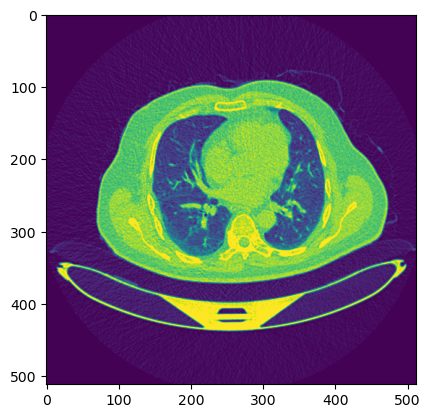

Malignant cases


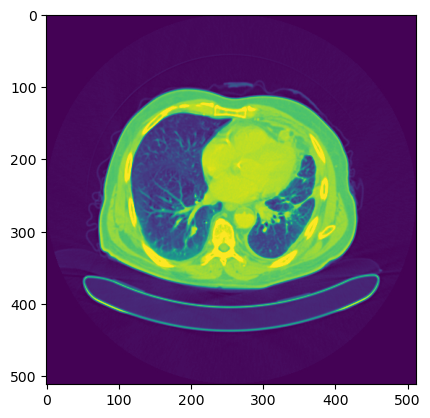

Normal cases


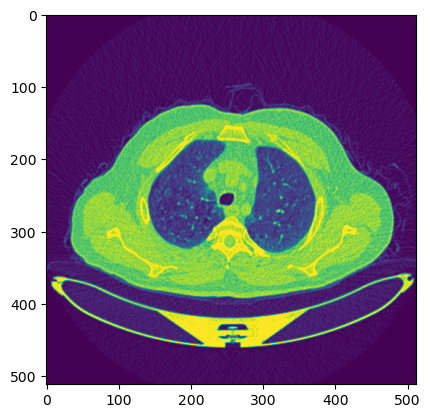

In [108]:
for i in categories:
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        print(i)
        img = cv2.imread(filepath, 0)
        pt.imshow(img)
        pt.show()
        break

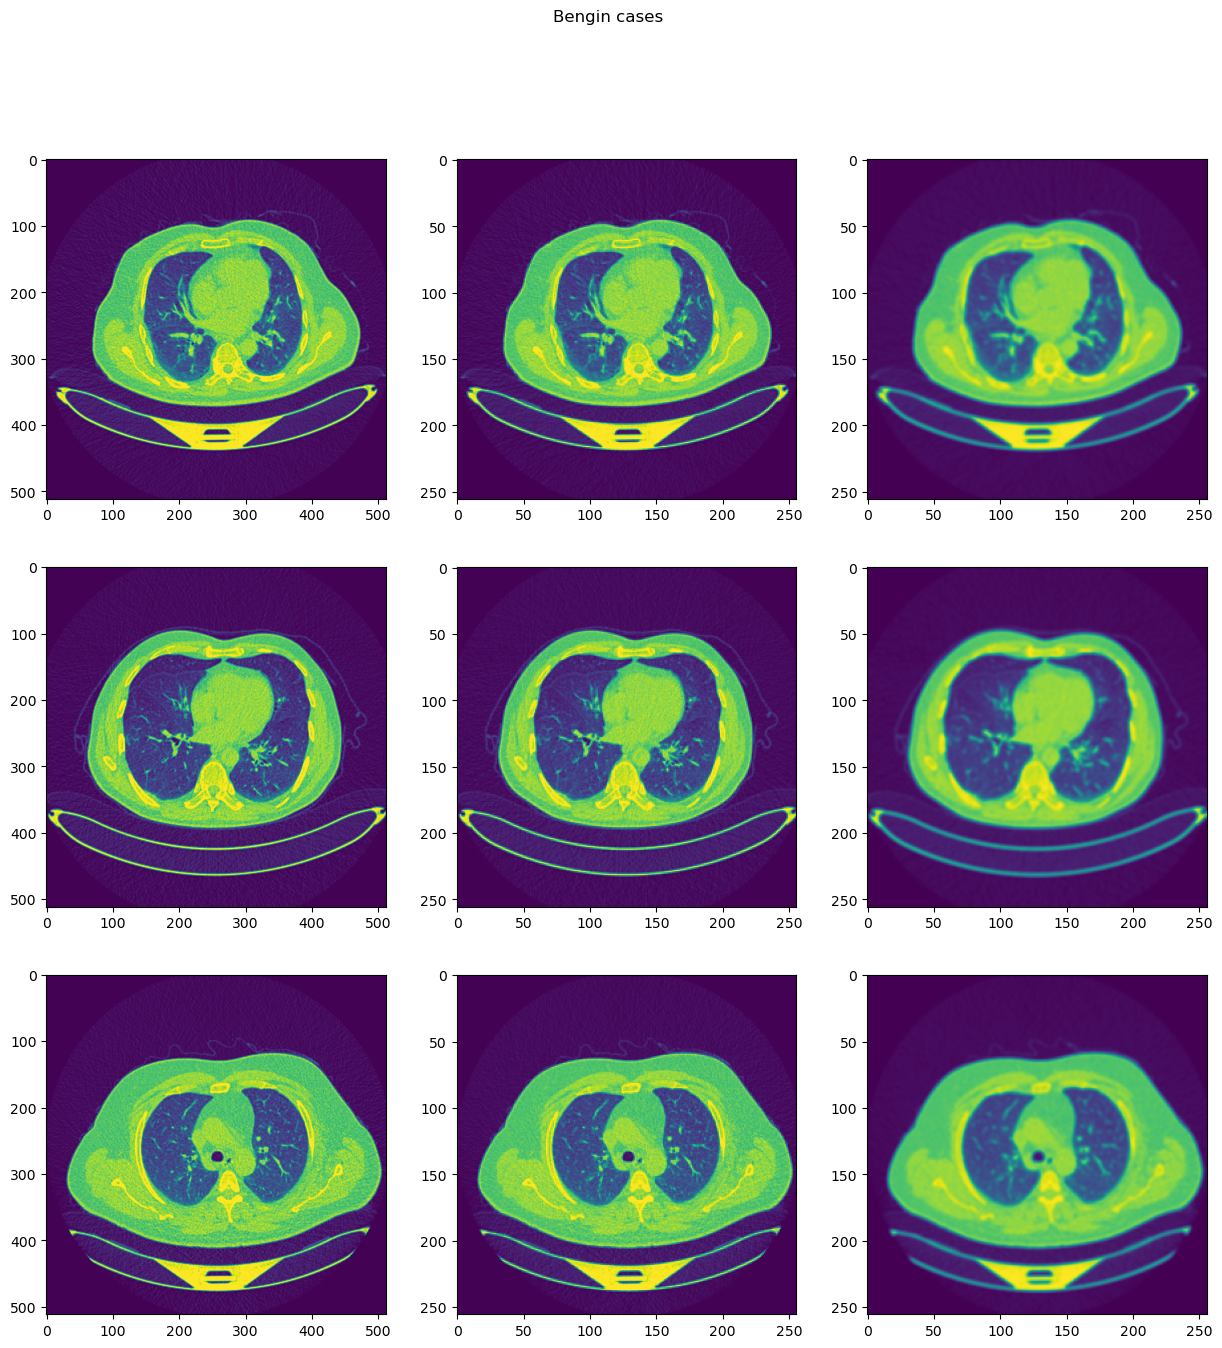

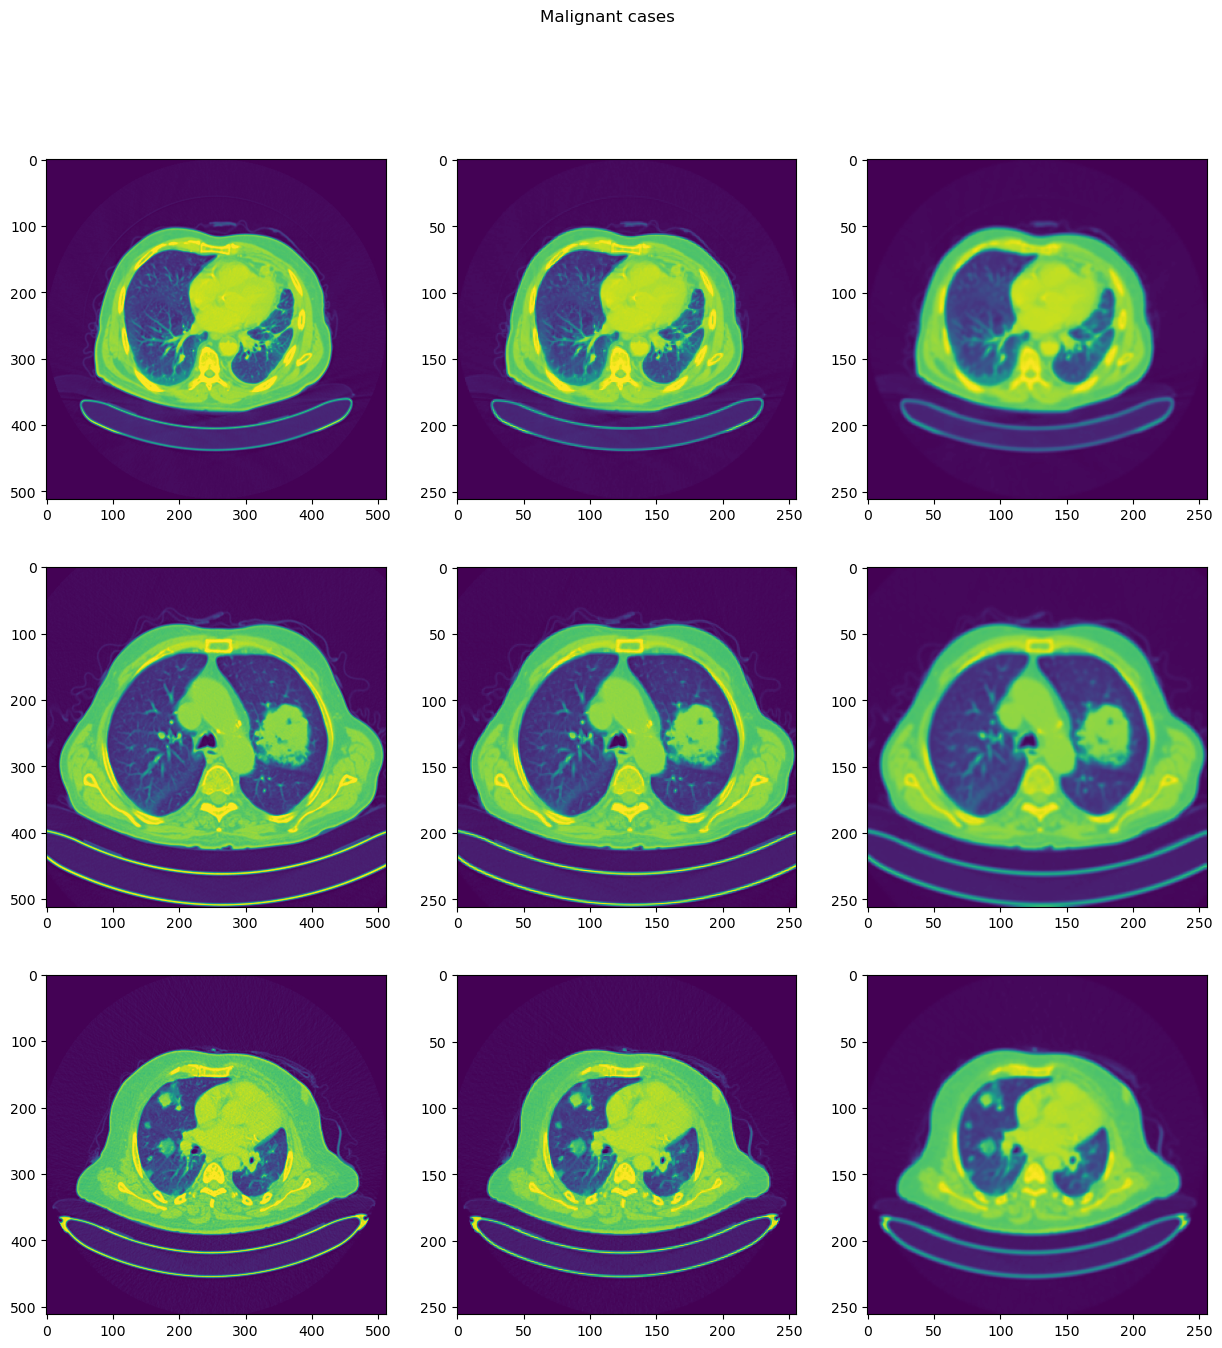

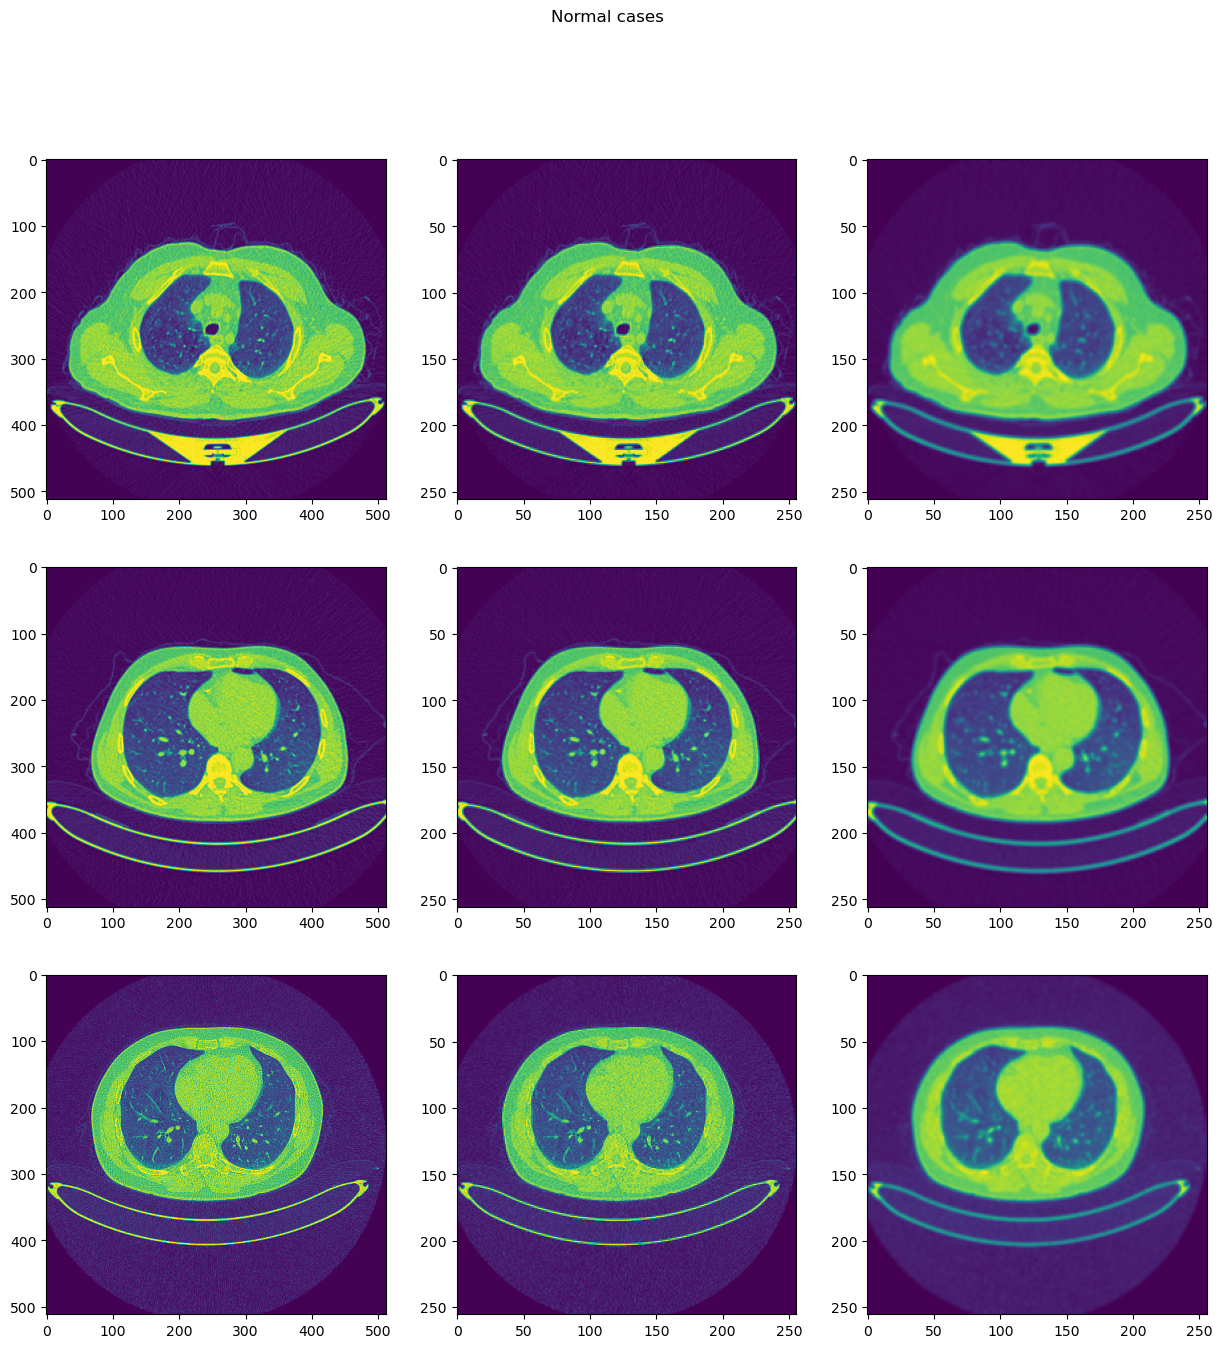

In [122]:
img_size = 256
for i in categories:
    cnt, samples = 0, 3
    fig, ax = pt.subplots(samples, 3, figsize=(15, 15))
    fig.suptitle(i)
    
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for curr_cnt, file in enumerate(os.listdir(path)):
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath, 0)
        
        img0 = cv2.resize(img, (img_size, img_size))
        
        img1 = cv2.GaussianBlur(img0, (5, 5), 0)
        
        ax[cnt, 0].imshow(img)
        ax[cnt, 1].imshow(img0)
        ax[cnt, 2].imshow(img1)
        cnt += 1
        if cnt == samples:
            break
        
pt.show()

In [127]:
import random

In [128]:
data = []
img_size = 256

for i in categories:
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath, 0)
        # preprocess here
        img = cv2.resize(img, (img_size, img_size))
        data.append([img, class_num])
        
random.shuffle(data)

In [129]:
X, y = [], []
for feature, label in data:
    X.append(feature)
    y.append(label)

In [130]:
from collections import Counter

In [131]:
print('X length:', len(X))
print('y counts:', Counter(y))

X length: 1097
y counts: Counter({1: 561, 2: 416, 0: 120})


In [132]:
# normalize
X = np.array(X).reshape(-1, img_size, img_size, 1)
X = X / 255.0
y = np.array(y)

In [133]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=10, stratify=y)

print(len(X_train), X_train.shape)
print(len(X_valid), X_valid.shape)

822 (822, 256, 256, 1)
275 (275, 256, 256, 1)


In [117]:
print(Counter(y_train), Counter(y_valid))

Counter({1: 420, 2: 312, 0: 90}) Counter({1: 141, 2: 104, 0: 30})


In [134]:
print(len(X_train), X_train.shape)

X_train = X_train.reshape(X_train.shape[0], img_size*img_size*1)

print(len(X_train), X_train.shape)

822 (822, 256, 256, 1)
822 (822, 65536)


In [135]:
from imblearn.over_sampling import SMOTE

print('Before SMOTE:', Counter(y_train))
smote = SMOTE()
X_train_sampled, y_train_sampled = smote.fit_resample(X_train, y_train)
print('After SMOTE:', Counter(y_train_sampled))

Before SMOTE: Counter({1: 420, 2: 312, 0: 90})
After SMOTE: Counter({2: 420, 1: 420, 0: 420})


In [136]:
X_train = X_train.reshape(X_train.shape[0], img_size, img_size, 1)
X_train_sampled = X_train_sampled.reshape(X_train_sampled.shape[0], img_size, img_size, 1)

print(len(X_train), X_train.shape)
print(len(X_train_sampled), X_train_sampled.shape)

822 (822, 256, 256, 1)
1260 (1260, 256, 256, 1)


In [152]:
model1 = Sequential()

# Convolutional layers
model1.add(Conv2D(64, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(256, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the convolutional layers
model1.add(Flatten())

# Fully connected layers
model1.add(Dense(512, activation='relu'))
model1.add(Dense(3, activation='softmax'))

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 230400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │     117,965,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,336,515 (451.42 MB)

 Trainable params: 118,336,515 (451.42 MB)

 Non-trainable params: 0 (0.00 B)

In [154]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
model1.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [156]:
history = model1.fit(X_train_sampled, y_train_sampled, batch_size=8, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
 30/158 ━━━━━━━━━━━━━━━━━━━━ 3:05 1s/step - accuracy: 0.3119 - loss: 1.3476

KeyboardInterrupt: 

In [158]:
import keras
model1.save('model1.keras')

In [160]:
from keras.models import load_model

model1 = load_model('model1.h5')

# Compile the model with the desired metrics
model1.compile(
    optimizer=keras.optimizers.RMSprop(),  
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 685ms/step
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       1.00      1.00      1.00       141
           2       0.99      1.00      1.00       104

    accuracy                           1.00       275
   macro avg       1.00      0.99      0.99       275
weighted avg       1.00      1.00      1.00       275



Confusion Matrix:
 [[ 29   0   1]
 [  0 141   0]
 [  0   0 104]]


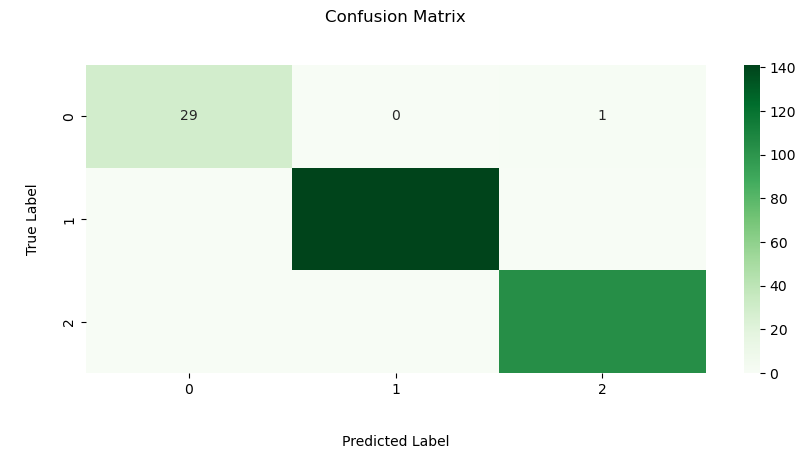

In [162]:
y_pred = model1.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_valid, y_pred_bool))

cm = confusion_matrix(y_true=y_valid, y_pred=y_pred_bool)
print("\n\nConfusion Matrix:\n", cm)

pt.figure(figsize=(10,4))
sb.heatmap(cm, annot=True, fmt='g', cmap='Greens')
pt.xlabel('\n\nPredicted Label\n')
pt.ylabel('\nTrue Label\n')
pt.title('Confusion Matrix\n\n')
pt.show()

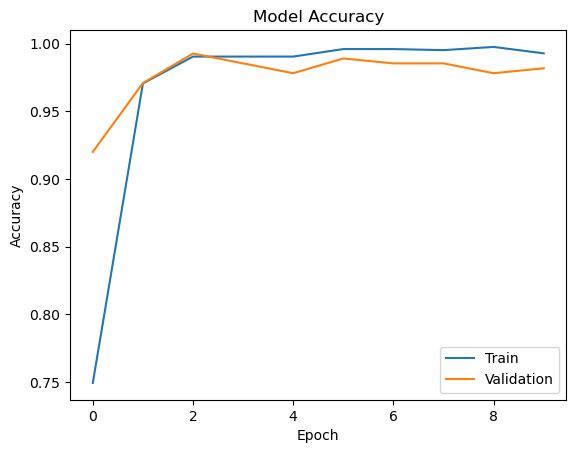

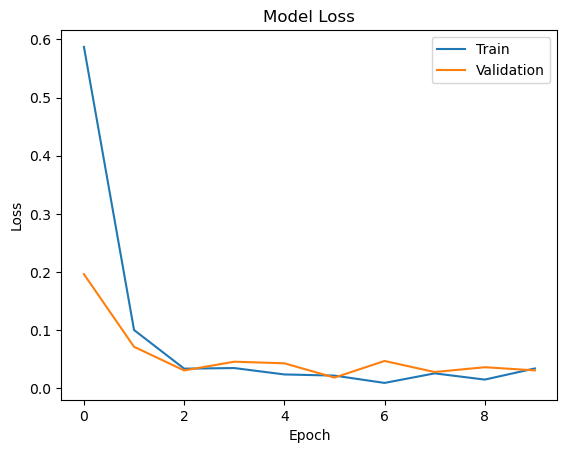

In [135]:
pt.plot(history.history['accuracy'], label='Train')
pt.plot(history.history['val_accuracy'], label='Validation')
pt.title('Model Accuracy')
pt.ylabel('Accuracy')
pt.xlabel('Epoch')
pt.legend()
pt.show()

pt.plot(history.history['loss'], label='Train')
pt.plot(history.history['val_loss'], label='Validation')
pt.title('Model Loss')
pt.ylabel('Loss')
pt.xlabel('Epoch')
pt.legend()
pt.show()

In [163]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the test images folder
test_directory = r"C:\Users\hiren\Rishi\lung_cancer"

# Load the pre-trained model
from keras.models import load_model
model1 = load_model('model1.h5')

# Define the image size
img_size = 224

# Load and preprocess the test images
def load_test_images(test_directory, img_size):
    test_images = []
    test_image_names = []
    for file in os.listdir(test_directory):
        filepath = os.path.join(test_directory, file)
        img = cv2.imread(filepath, 0)
        if img is not None:
            img_resized = cv2.resize(img, (img_size, img_size))
            test_images.append(img_resized)
            test_image_names.append(file)
    return np.array(test_images), test_image_names

# Load the test images
test_images, test_image_names = load_test_images(test_directory, img_size)

# Normalize the test images
test_images = test_images / 255.0
test_images = test_images.reshape(-1, img_size, img_size, 1)

# Predict the labels for the test images
y_test_pred = model1.predict(test_images)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)

# Define the categories
categories = ['Bengin cases', 'Malignant cases ', 'Normal cases']  # replace with your actual categories

# Display the test images with their predicted labels
plt.figure(figsize=(12, 8))
for i in range(len(test_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i].reshape(img_size, img_size), cmap='gray')
    plt.title(f'Predicted: {categories[y_test_pred_labels[i]]}\nFilename: {test_image_names[i]}')
    plt.axis('off')
    if i == 8:  # Display up to 9 images
        break
plt.show()

# Print out the predictions in a more readable format
for i in range(len(test_images)):
    print(f'Image: {test_image_names[i]} - Predicted: {categories[y_test_pred_labels[i]]}')

ValueError: math domain error

In [165]:
import gradio as gr
import numpy as np
from keras.models import load_model
from PIL import Image

# Load the pre-trained model
model = load_model('model1.h5')

# Compile the model with the desired metrics
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)

def predict_lung_cancer(image_path):
    try:
        # Read the uploaded image file
        img = Image.open(image_path).convert('L')  # Convert image to grayscale
        img = img.resize((256, 256))  # Resize to the input size expected by the model
        img_array = np.array(img) / 255.0  # Normalize pixel values
        img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Make predictions with the model
        predictions = model.predict(img_array)

        # Get the class label with the highest probability
        class_labels = ['Benign', 'Malignant', 'Normal']
        predicted_class = class_labels[np.argmax(predictions[0])]

        # Return the output prediction
        return f"The predicted class is: {predicted_class}"
    
    except Exception as e:
        # Return the error message
        return f"Error: {str(e)}"

# Create a Gradio interface
iface = gr.Interface(
    fn=predict_lung_cancer,
    inputs=gr.components.Image(type="filepath"),  # Specify the input type as filepath
    outputs=gr.components.Textbox(),              # Specify the output type as text
    title="Lung Cancer Detection",
    description="Upload a JPEG image to detect lung cancer"
)

# Launch the Gradio app
iface.launch(share=True)


Running on local URL:  http://127.0.0.1:7860


Exception in thread Thread-8 (_do_normal_analytics_request):
Traceback (most recent call last):
  File "C:\Users\hiren\anaconda3\Lib\site-packages\httpcore\_exceptions.py", line 10, in map_exceptions
    yield
  File "C:\Users\hiren\anaconda3\Lib\site-packages\httpcore\_backends\sync.py", line 168, in start_tls
    raise exc
  File "C:\Users\hiren\anaconda3\Lib\site-packages\httpcore\_backends\sync.py", line 163, in start_tls
    sock = ssl_context.wrap_socket(
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hiren\anaconda3\Lib\ssl.py", line 517, in wrap_socket
    return self.sslsocket_class._create(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hiren\anaconda3\Lib\ssl.py", line 1108, in _create
    self.do_handshake()
  File "C:\Users\hiren\anaconda3\Lib\ssl.py", line 1383, in do_handshake
    self._sslobj.do_handshake()
TimeoutError: _ssl.c:989: The handshake operation timed out

The above exception was the direct cause of the following exception:

Traceback (most r


Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


In [142]:
model = load_model('model1.h5', compile=True)

NameError: name 'load_model' is not defined

In [144]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

AttributeError: 'MLPClassifier' object has no attribute 'compile'

In [146]:
print(model1.input_shape)


NameError: name 'model1' is not defined